# 1 Import Libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 2 Load Dataset

In [54]:
DATA_PATH = "data/uk_electricity_bills.xlsx"
OUTPUT_PATH = "outputs"
FIGURES_PATH = os.path.join(OUTPUT_PATH, "figures")

# Create output folders if they don't exist
os.makedirs(FIGURES_PATH, exist_ok=True)

# Load the correct sheet, skipping metadata rows
df = pd.read_excel(DATA_PATH, sheet_name='2.2.3', skiprows=11)

# 3 Clean Column Names

In [55]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(':','')

# Reset index for convenience
df = df.reset_index(drop=True)

# Inspect dataset
print(df.info())
df.head()

# Save cleaned dataset for GitHub
df.to_csv(os.path.join(OUTPUT_PATH, "cleaned_data.csv"), index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   year                                    64 non-null     int64  
 1   region                                  64 non-null     object 
 2   credit_unit_cost_(pence_per_kwh)        64 non-null     float64
 3   credit_bill_(pounds)                    64 non-null     float64
 4   direct_debit_unit_cost_(pence_per_kwh)  64 non-null     float64
 5   direct_debit_bill_(pounds)              64 non-null     float64
 6   prepayment_unit_cost_(pence_per_kwh)    64 non-null     float64
 7   prepayment_bill_(pounds)                64 non-null     float64
 8   overall_unit_cost_(pence_per_kwh)       64 non-null     float64
 9   overall_bill_(pounds)                   64 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 5.1+ KB
None


# 4 Exploratory Analysis

In [56]:
# 4.1 Average Overall Electricity Bill
average_bill = df['overall_bill_(pounds)'].mean()
print(f"Average Overall Electricity Bill (2022): £{average_bill:.2f}")

# 4.2 Regions with Highest and Lowest Overall Bill
max_region = df.loc[df['overall_bill_(pounds)'].idxmax(), 'region']
min_region = df.loc[df['overall_bill_(pounds)'].idxmin(), 'region']
print(f"Region with highest bill: {max_region}")
print(f"Region with lowest bill: {min_region}")

Average Overall Electricity Bill (2022): £1109.44
Region with highest bill: Merseyside & North Wales
Region with lowest bill: Northern Ireland


# 5 Visualization - Overall Bill by Region

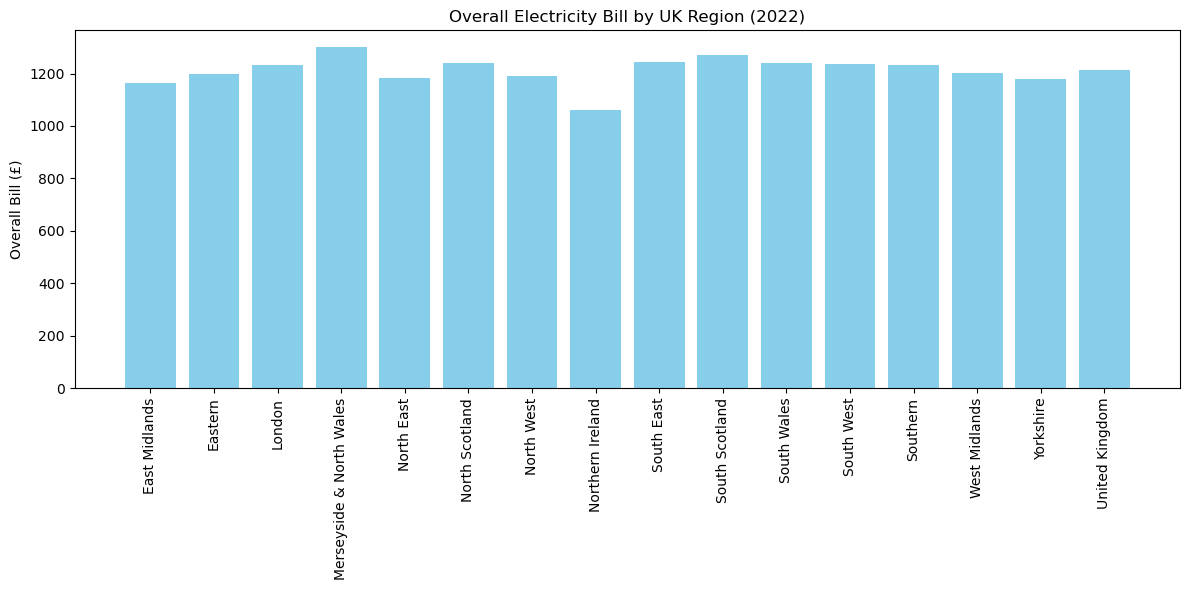

In [57]:
plt.figure(figsize=(12,6))
plt.bar(df['region'], df['overall_bill_(pounds)'], color='skyblue')
plt.xticks(rotation=90)
plt.ylabel('Overall Bill (£)')
plt.title('Overall Electricity Bill by UK Region (2022)')
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_PATH, "overall_bill_by_region.png"))
plt.show()

# 6 Compare Payment Methods

Average Credit Bill: £1162.60
Average Direct Debit Bill: £1105.31
Average Prepayment Bill: £1066.63


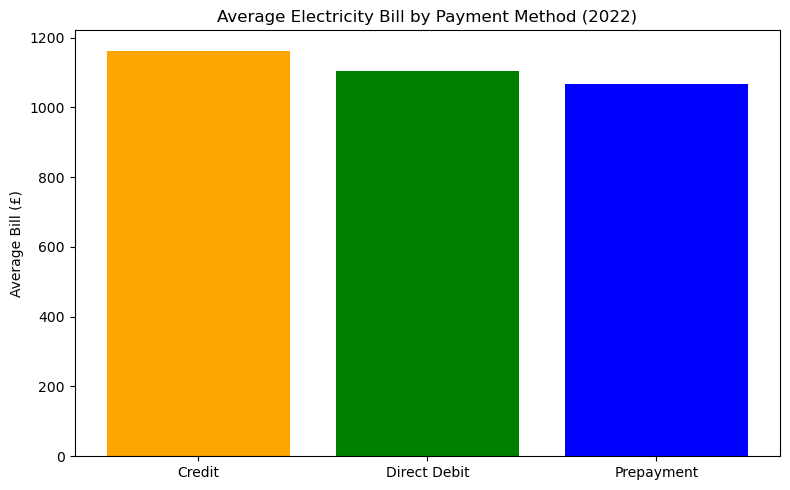

In [58]:
avg_credit = df['credit_bill_(pounds)'].mean()
avg_direct = df['direct_debit_bill_(pounds)'].mean()
avg_prepay = df['prepayment_bill_(pounds)'].mean()

print(f"Average Credit Bill: £{avg_credit:.2f}")
print(f"Average Direct Debit Bill: £{avg_direct:.2f}")
print(f"Average Prepayment Bill: £{avg_prepay:.2f}")

# Plot
methods = ['Credit', 'Direct Debit', 'Prepayment']
values = [avg_credit, avg_direct, avg_prepay]

plt.figure(figsize=(8,5))
plt.bar(methods, values, color=['orange', 'green', 'blue'])
plt.ylabel('Average Bill (£)')
plt.title('Average Electricity Bill by Payment Method (2022)')
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_PATH, "average_bill_by_payment.png"))
plt.show()

# 7 Additional Analysis (Optional)

In [59]:
# Example: Top 5 regions with highest overall bills
top5 = df.sort_values(by='overall_bill_(pounds)', ascending=False).head(5)
print("Top 5 regions with highest bills:")
print(top5[['region', 'overall_bill_(pounds)']])

Top 5 regions with highest bills:
                      region  overall_bill_(pounds)
19  Merseyside & North Wales            1299.914542
25            South Scotland            1269.042524
24                South East            1242.432964
21            North Scotland            1240.470718
26               South Wales            1238.424715
